<a href="https://colab.research.google.com/github/jewookwak/AI/blob/master/DL_ch03_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB 인터넷 영화 데이터베이스
양극단의 리뷰 5만 개.
50%는 부정 50%는 긍정 리뷰로 구성
train data, test data 각각 2.5만개 씩

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words =10000 : 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미.

In [ ]:
train_data[0]
#값은 단어 시퀀스가 인코딩 된 것.

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]
# 부정 : 0 , 긍정 : 1

1

In [ ]:
max([max(sequence) for sequence in train_data])
#가장 자주 등장하는 단어 1만 개로 제한했기 때문에 단어 인덱스는 9,999를 넘지 않음.

9999

In [ ]:
word_index = imdb.get_word_index()   #word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # 정수 인덱스와 단어를 매핑하도록 뒤집음.
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]]) # 리뷰를 디코딩. 0,1,2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺌

In [ ]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# 데이터 준비
신경망에 숫자 리스트를 주입할 수 없음.
리스트를 텐서로 바꾸는 두 가지 방법이 있음.
- 같은 길이가 되도록 리스트에 패딩을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환, 그다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용(Embedding 층).
- 리스트를 원-핫 인코딩하여 0과 1의 벡터로 변환. 예를 들어 시퀀스[3, 5]를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환. 그다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense 층을 신경망의 첫 번째 층으로 사용.

In [ ]:
#원-핫 벡터 만들기
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 신경망 모델 만들기
- 입력 데이터가 벡터고, 레이블은 스칼라(1 또는 0).
- relu 활성화 함수를 사용한 완전 연결 층 Dense(16, activation='relu') 을 그냥 쌓음.
- Dense 층에 전달한 매개변수(16)는 은닉 유닛의 개수.
- 하나의 은닉 유닛은 층이 나타내는 표현 공간에서 하나의 차원이 됨.
- 16개의 은닉 유닛이 있다는 것은 가중치 행렬 W의 크기가 (input_dimension, 16)이라는 뜻



Dense 층을 쌓을 때 두 가지 중요한 구조상 결정이 필요함.
- 얼마나 많은 층을 사용할 것인가?
- 각 층에 얼마나 많은 은기 유닛을 둘 것인가?
일반적인 구조
- 16개의 은닉 유닛을 가진 2개의 은닉 층
- 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세번째 층
- 중간에 있는 은닉 층은 활성화 함수로 relu를 사용
- 마지막 층은 확률 (0과 1 사이의 점수로, 어떤 샘플이 타깃 '1'일 가능성이 높다는 것은 그 리뷰가 긍정일 가능성이 높다는 것을 의미)을 출력하기 위해 시그모이드 활성화 함수를 사용

활성화 함수?
- 활성화 함수는 비선형성을 갖음.
- 가설 공간을 풍부하게 만들어 층을 깊게 만드는 장점을 살릴 수 있음

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation ='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

손실 함수, 옵티마이저 선택
- 손실함수 : binary_crossentropy / mean_squared_error 중 전자가 적합.
- 확률을 출력하는 모델에서는 크로스엔트로피가 최선의 선택 (크로스엔트로피는 확률 분포 간의 차이를 측정, 여기에서는 원본 분포와 예측 분포의 차이를 측정)
- 옵티마이저 : rmsprop


In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentroy', metrics=['accuracy'])

rmsprop, binary_crossentropy, accuracy가 포함되어 있기 때문에 옵티마이저, 손실 함수, 측정 지표를 문자열로 지정 가능.  
- 옵티마이저의 매개변수를 바꿔야하는 경우 존재 -> 옵티마이저 파이썬 클래스를 사용해 객체를 직접 만들어 optimizer 매개변수에 전달.
- 자신만의 손실 함수, 측정, 함수를 전달 해야하는 경우 존재 -> loss와 metrics 매개변수에 함수 객체를 전달.

In [ ]:
#1) 옵티마이저 설정하기
from tensorflow.keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr=0.001),loss = 'binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss = losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


# 훈련 검증
원본 훈련 데이터에서 10,000개의 샘플을 떼어 검증 세트로 만듬.

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
x_val.shape

(10000, 10000)

In [ ]:
partial_x_train.shape

(15000, 10000)

- 모델을 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련(x_train과 y_train 텐서에 있는 모든 샘플에 대해 20번 반복).
- 동시에 따로 떼어 놓은 1만 개의 샘플에서 손실과 정확도를 층정.
- 이렇게 하려면 validation_data 매개변수에 검증 데이터를 전달해야 함.

In [ ]:
model.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics=['acc'])

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 76ms/step - loss: 0.5076 - acc: 0.7907 - val_loss: 0.4004 - val_acc: 0.8535
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3077 - acc: 0.9026 - val_loss: 0.3191 - val_acc: 0.8795
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2250 - acc: 0.9289 - val_loss: 0.2808 - val_acc: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1802 - acc: 0.9405 - val_loss: 0.2764 - val_acc: 0.8903
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1469 - acc: 0.9529 - val_loss: 0.2838 - val_acc: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1212 - acc: 0.9615 - val_loss: 0.2898 - val_acc: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1030 - acc: 0.9683 - val_loss: 0.3057 - val_acc: 0.8850
Epoch 8/20
30/30 [==============================] - 2s 67ms/step - loss: 0.0814 - a

- model.fit() 메서드는 History 객체를 반환. 
이 객첸느 훈련한는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성을 갖음.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

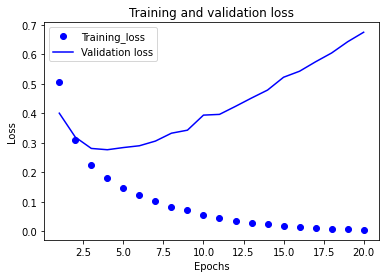

In [ ]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo',label = 'Training_loss') # bo : 파란색 점선
plt.plot(epochs, val_loss,'b',label='Validation loss') # b : 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

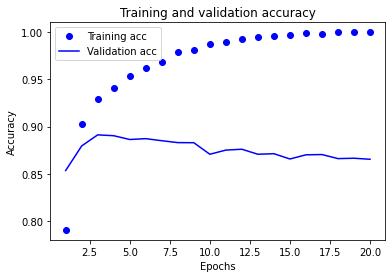

In [ ]:
#훈련과 검증 정확도 그리기
plt.clf() #그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

과대적합 (overfitting) 발생.  
training data의 acc는 증가하지만,  
validation data의 acc는 일부 증가하다 감소.  
3epochs 까지는 과대적합이 일어나지 않음.

In [ ]:
#모델을 처음부터 다시 훈련하기 (3epochs)
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss= 'binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 3, batch_size =  512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 3s 41ms/step - loss: 0.4972 - accuracy: 0.8204
Epoch 2/3
49/49 [==============================] - 1s 30ms/step - loss: 0.2897 - accuracy: 0.9022
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.2857 - accuracy: 0.8860


In [ ]:
results

[0.28574028611183167, 0.8859599828720093]

# 훈련된 모델로 새로운 데이터에 대해 예측
predict 메서드를 사용해서 어떤 리뷰가 긍정일 확률을 예측할 수 있음.

In [ ]:
model.predict(x_test)

array([[0.24314204],
       [0.99968696],
       [0.82086074],
       ...,
       [0.11039412],
       [0.09495717],
       [0.51558226]], dtype=float32)

위 결과 어떤 샘플은 확실을 갖고 있고(acc=0.99), 어떤 샘플은 확신이 없음(acc = 0.11).

# 정리
- 원본 데이터를 신경망에 텐서로 주입하기 위해서는 꽤 많은 전처리가 필요함, 단어 시퀀스는 이진 벡터로 인코딩 될 수 있고 다른 인코딩 방식도 존재.
- relu 활성화 함수와 함께 Dense 층을 쌓는 네트워크는 (감성 분률르 포함하여) 여러 종류의 문제에 이진 벡터로 인코딩될 수 있고 다른 인코딩 방식도 있음.
- (출력 클래스가 2개인) 이진 분류 문제에서는 네트워크는 하나의 유닛과 sigmoid 활성화 함수를 가진 Dense 층으로 끝나야 함. 이 신경망의 출력은 확률을 나타내는 0과 1 사이의 스칼라 값임.
- 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실 함수는 binary_crossentropy 임.
- rmsprop 옵티마이저는 문제에 상관없이 일반적으로 충분히 좋은 선택임.
- 훈련 데이터에 대해 성능이  향상됨에 따라 신경망은 과대적합되기 시작하고 이전에 본적 없는 데이터에서는 결과가 점점 나빠지게 됨. 항상 훈련 세트 이외의 데이터에서 성능을 모니터링 해야함.